## Logistic Regression - COVID-19

### Group Members
- Ramya Prakash
- Soumyadip Mitra
- Kirk Mason (James Mason)
- Hari Chamlagai
- Phil Nguyen

#### Introductory Paragraph: 
We are going to run a Simple Linear Regression and Polynomial regression on a COVID-19 Dataset for Chicago by following the discussion in the below forum and will also research on whether we can find similar datasets for North Carolina and and how datasets for states differ from this Chicago, city-level dataset in their structure and data aggregation levels.

**Link to the story: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("COVID-19_Daily_Testing.csv")
data.head()

Date       Day  Tests Cases People Not-Positive - Total  \
0    03-01-20    Sunday      1     0                           1   
1    05-02-20  Saturday  2,431   705                       1,726   
2  05/14/2020  Thursday  4,098   772                       3,326   
3    03-05-20  Thursday     17     1                          16   
4    03-06-20    Friday     18     3                          15   

   People Tested - Age 0-17 People Tested - Age 18-29  \
0                         0                         0   
1                       129                       470   
2                       260                       805   
3                         4                         2   
4                         1                         5   

  People Tested - Age 30-39  People Tested - Age 40-49  \
0                         1                          0   
1                       458                        458   
2                       833                        685   
3                         0                          4   
4                         1                          3   

   People Tested - Age 50-59  ...  People Not-Positive - Age Unknown  \
0                          0  ...                                  0   
1                        412  ...                                  1   
2                        604  ...                                 16   
3                          3  ...                                  0   
4                          3  ...                                  1   

   People Not-Positive - Female  People Not-Positive - Male  \
0                             0                           1   
1                           898                         797   
2                         1,654                       1,424   
3                             7                           9   
4                             8                           7   

   People Not-Positive - Gender Unknown People Not-Positive - Latinx  \
0                                     0                            0   
1                                    31                          226   
2                                   248                          529   
3                                     0                            2   
4                                     0                            2   

  People Not-Positive - Asian Non-Latinx  \
0                                      0   
1                                     30   
2                                     43   
3                                      0   
4                                      0   

   People Not-Positive - Black Non-Latinx  \
0                                       0   
1                                     273   
2                                     430   
3                                       4   
4                                       1   

  People Not-Positive - White Non-Latinx  \
0                                      1   
1                                    225   
2                                    442   
3                                      2   
4                                      2   

   People Not-Positive - Other Race Non-Latinx  \
0                                            0   
1                                           51   
2                                          109   
3                                            1   
4                                            1   

   People Not-Positive - Unknown Race/Ethnicity  
0                                             0  
1                                           921  
2                                         1,773  
3                                             7  
4                                             9  

[5 rows x 59 columns]

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
Date                                            88 non-null object
Day                                             88 non-null object
Tests                                           89 non-null object
Cases                                           89 non-null object
People Not-Positive - Total                     89 non-null object
People Tested - Age 0-17                        89 non-null int64
People Tested - Age 18-29                       89 non-null object
People Tested - Age 30-39                       89 non-null object
People Tested - Age 40-49                       89 non-null int64
People Tested - Age 50-59                       89 non-null int64
People Tested - Age 60-69                       89 non-null int64
People Tested - Age 70-79                       89 non-null int64
People Tested - Age 80+                         89 non-null int64
People Tested - Age Unknown     

In [4]:
## Clean data
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
#data['People Not-Positive - Total'] = data['People Not-Positive - Total'].str.replace(',','')
#data['People Tested - Age 18-29'] = data['People Tested - Age 18-29'].str.replace(',','')
#data['People Tested - Age 30-39'] = data['People Tested - Age 30-39'].str.replace(',','')
#data['People Tested - Female'] = data['People Tested - Female'].str.replace(',','')
#data['People Tested - Male'] = data['People Tested - Male'].str.replace(',','')
#data['People Tested - Latinx'] = data['People Tested - Latinx'].str.replace(',','')
#data['People Tested - Unknown Race/Ethnicity'] = data['People Tested - Unknown Race/Ethnicity'].str.replace(',','')
#data['People Not-Positive - Age 18-29'] = data['People Not-Positive - Age 18-29'].str.replace(',','')
#data['People Not-Positive - Female'] = data['People Not-Positive - Female'].str.replace(',','')
#data['People Not-Positive - Male'] = data['People Not-Positive - Male'].str.replace(',','')
#data['People Not-Positive - Unknown Race/Ethnicity'] = data['People Not-Positive - Unknown Race/Ethnicity'].str.replace(',','')

data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])
#data['People Not-Positive - Total'] = pd.to_numeric(data['People Not-Positive - Total'])
#data['People Tested - Age 18-29'] = pd.to_numeric(data['People Tested - Age 18-29'])
#data['People Tested - Age 30-39'] = pd.to_numeric(data['People Tested - Age 30-39'])
#data['People Tested - Female'] = pd.to_numeric(data['People Tested - Female'])
#data['People Tested - Male'] = pd.to_numeric(data['People Tested - Male'])
#data['People Tested - Latinx'] = pd.to_numeric(data['People Tested - Latinx'])
#data['People Tested - Unknown Race/Ethnicity'] = pd.to_numeric(data['People Tested - Unknown Race/Ethnicity'])
#data['People Not-Positive - Age 18-29'] = pd.to_numeric(data['People Not-Positive - Age 18-29'])
#data['People Not-Positive - Female'] = pd.to_numeric(data['People Not-Positive - Female'])
#data['People Not-Positive - Male'] = pd.to_numeric(data['People Not-Positive - Male'])
#data['People Not-Positive - Unknown Race/Ethnicity'] = pd.to_numeric(data['People Not-Positive - Unknown Race/Ethnicity'])

In [5]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

<Figure size 1440x720 with 0 Axes>

In [6]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

The linear model is: Y = 97.777 + 0.18572X


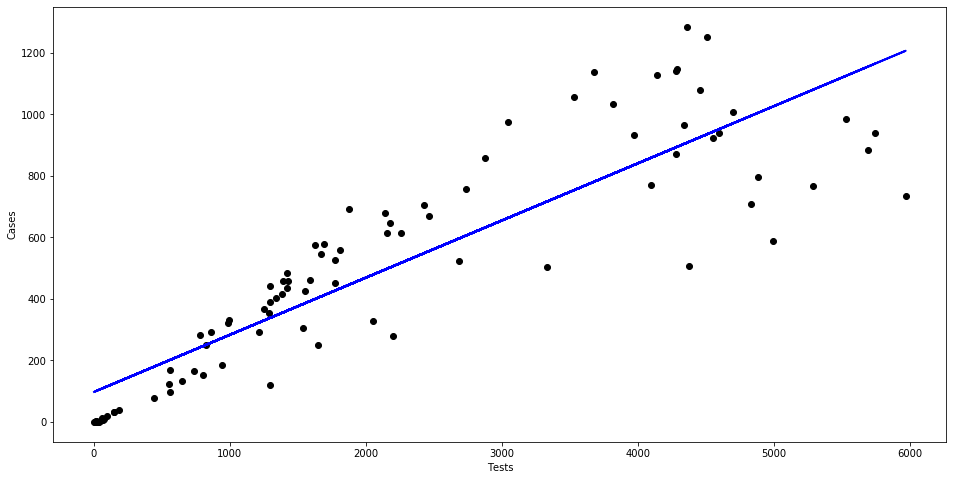

In [7]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [8]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,predictions)))

RMSE for Linear Regression=> 171.79768160540917


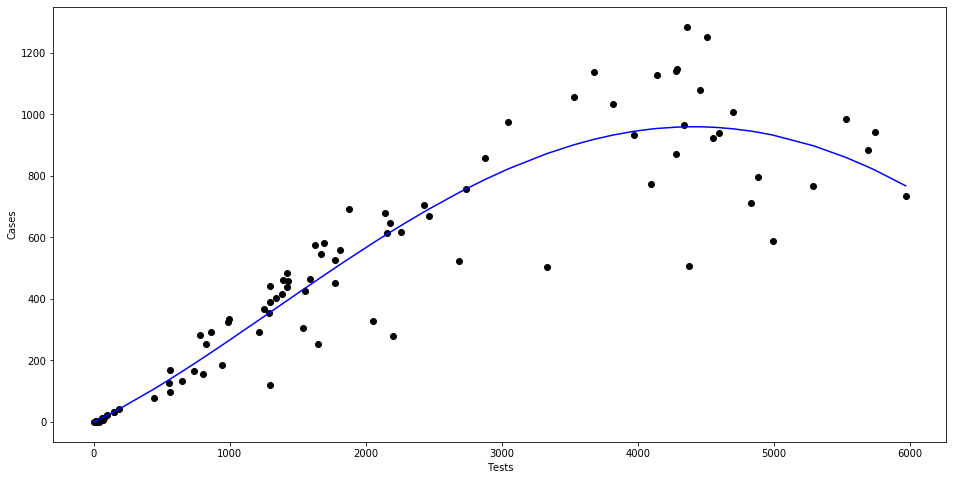

In [9]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [10]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

RMSE for Linear Regression=> 131.07677593555383


#### Question 1: If you were asked to perform the analysis on other states such as North Carlolina, can you obtain the data?

**Answer:** yes, we did research for COVID-19 pandemic daily data and found state wise related information.We were able to downoad North Carolina related COVID-19 daily dataset from the following link : https://covidtracking.com/data/download (North Carolina: /api/v1/states/nc/daily.csv).

The first few observations of NC Covid dataset obtained is shown below.

In [11]:
data = pd.read_csv("NC_daily.csv")
data.head()

date state  positive   negative  pending  hospitalizedCurrently  \
0  20200716    NC     93426  1219331.0      NaN                 1134.0   
1  20200715    NC     91266  1193371.0      NaN                 1142.0   
2  20200714    NC     89484  1165362.0      NaN                 1109.0   
3  20200713    NC     87528  1132958.0      NaN                 1040.0   
4  20200712    NC     85701  1113874.0      NaN                 1070.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                     NaN             NaN              NaN   
2                     NaN             NaN              NaN   
3                     NaN             NaN              NaN   
4                     NaN             NaN              NaN   

   onVentilatorCurrently  ...   posNeg  deathIncrease hospitalizedIncrease  \
0                    NaN  ...  1312757             20                    0   
1                    NaN  ...  1284637             16                    0   
2                    NaN  ...  1254846             42                    0   
3                    NaN  ...  1220486              7                    0   
4                    NaN  ...  1199575              4                    0   

                                       hash commercialScore  \
0  18249248f2df3cf055079cb091a17f4524251a2b               0   
1  2557e0b9b47598ac52149cf33b45ca0bcb6ead17               0   
2  f0284678989153641f28c72d75b27f7bc6ed879d               0   
3  936fd0baa4fb702f826852e09f00e6acbc14bd92               0   
4  28289baa2c02f7e5114f8b8b2adbf13638d280ce               0   

  negativeRegularScore  negativeScore  positiveScore score  grade  
0                    0              0              0     0    NaN  
1                    0              0              0     0    NaN  
2                    0              0              0     0    NaN  
3                    0              0              0     0    NaN  
4                    0              0              0     0    NaN  

[5 rows x 41 columns]

#### Question 2: Are there any problems with state level data or is it all reported in exactly the same way?

1. In the NC State COVID-19 data obtained is cumulative for each day. Example: we may need to compute to find the increase in *positive* cases  by subtracting the value of *positive* (column/variable) from the previous day from the value of *positive*(column/variable) for the current day.
2. Returns null if no data is available, so need to hanlde isNull condition. And then accordingly handle missing values.
3. Unlike Chicago dataset , there is no issue with ',' or spaces in the given State dataset, it is clean compared to chicago dataset. 
4. In the given state dataset date fields are in different formats, so need to convert them into one single format.
5. By comparing the rate of cases and deaths, we can get a sense of how COVID-19 has affected the state.Since confirmed case numbers may be dependent on how much testing a state is doing,it would be challenging to use this factor to compare against an urban city like chicago where facilities are easily available when compared to other cities/counties within an given state and thus testing rate would also be high.  